In [5]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from process import fMRIDataset
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
import nibabel as nib
import os
import glob

import process 


ppdata_path = "/media/large_ssd/ab126/r03_ppdata"
paths = os.listdir(ppdata_path)

nifti_rel_path = ''
nifti_path = ppdata_path + '/r03_004' +  nifti_rel_path
for pth in glob.glob(nifti_path + '/*.nii'):
    img_file = nib.load(pth)
    #img_file = process.load_nifti(pth)
    print(img_file.shape)
    tmp = pth

(91, 109, 91, 765)


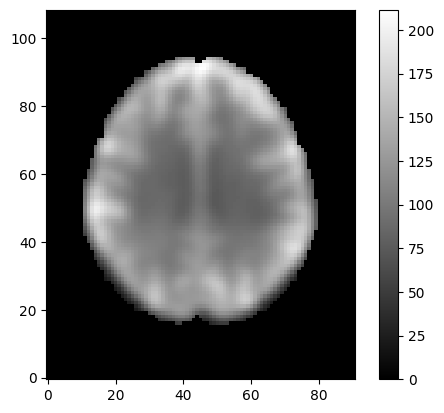

In [32]:
import matplotlib.pyplot as plt

orig_img_data = img_file.get_fdata()
plt.imshow(orig_img_data[:,:, 53, 0].T, cmap='gray', origin='lower') # Transposing gives MNI coord system
plt.colorbar()

(620, 109, 91, 91)

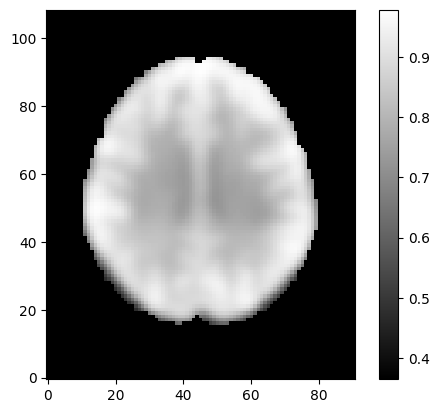

In [33]:
f_img_data = process.load_nifti(tmp)

plt.imshow(f_img_data[0, :, :, 53], cmap='gray', origin='lower') 
plt.colorbar()
f_img_data.shape

In [37]:
glob.glob(tmp)

['/media/large_ssd/ab126/r03_ppdata/r03_009/dswauR03_009_Ax_Functional_20210413130425_12.nii']

# Load Data Handler

In [27]:
import process

import importlib
importlib.reload(process)

from process import fMRIDataset

In [28]:


batch_size = 30 #5
ppdata_path = "/media/large_ssd/ab126/r03_ppdata"
nifti_rel_path = ''
numpy_rel_path = '/numpy'
single_subject = None #'r03_004'
data_handler = fMRIDataset(ppdata_path, nifti_rel_path=nifti_rel_path, numpy_rel_path=numpy_rel_path, batch_size=batch_size,
                          private_dataset=True, single_subject=single_subject)

In [29]:
data_handler.precompute_nifti2numpy(set_max_x=96, set_max_y=80, set_max_z=80, only_indices=True)

1st pass 

Subject r03_009
dswauR03_009_Ax_Functional_20210413130425_12.nii
Done

Subject r03_004
Done

Subject r03_015
Done

Subject r03_016
Done

Subject r03_014
Done

Subject r03_011
Done

Subject r03_002
Done

Subject r03_020
Done

Subject r03_013
Done

Subject r03_012
Done

Subject r03_017
dswauR03_017_Ax_Functional_20210708140458_12.nii
Done

Subject r03_006
Done

Subject r03_018
Done

Subject r03_005
Done

Subject r03_003
Done

Subject r03_008
Done

Subject r03_010
Done

Subject r03_019
Done

Subject r03_007
Done


In [141]:
data_handler.precompute_nifti2numpy(set_max_x=96, set_max_y=80, set_max_z=80)

1st pass 

Subject r03_004
dswauR03_004_AX_Functional_20210330103516_10.nii
Done

2nd pass 

Subject r03_004
Done


In [30]:
data_handler.subj_run_batch_sizes

{'r03_009': {'dswauR03_009_Ax_Functional_20210413130425_12.nii': 21},
 'r03_004': {'dswauR03_004_AX_Functional_20210330103516_10.nii': 26},
 'r03_015': {'dswauR03_015_Ax_Functional_20210622102619_12.nii': 19},
 'r03_016': {'dswauR03_016_Ax_Functional_20210623112641_12.nii': 18},
 'r03_014': {'dswauR03_014_Ax_Functional_20210616102916_12.nii': 23},
 'r03_011': {'dswauR03_011_Ax_Functional_20210506113234_17.nii': 19},
 'r03_002': {'dswauR03_002_AX_Functional_20210324133939_10.nii': 27},
 'r03_020': {'dswauR03_020_Ax_Functional_20210827101623_12.nii': 27},
 'r03_013': {'dswauR03_013_Ax_Functional_20210602102323_12.nii': 22},
 'r03_012': {'dswauR03_012_Ax_Functional_20210511133119_12.nii': 19},
 'r03_017': {'dswauR03_017_Ax_Functional_20210708140458_12.nii': 26},
 'r03_006': {'dswauR03_006_AX_Functional_20210408133516_10.nii': 21},
 'r03_018': {'dswauR03_018_Ax_Functional_20210730103623_12.nii': 19},
 'r03_005': {'dswauR03_005_AX_Functional_20210405101841_10.nii': 18},
 'r03_003': {'dswauR

In [32]:
data_handler.subject_inds

[('r03_009', 0),
 ('r03_004', 21),
 ('r03_015', 47),
 ('r03_016', 66),
 ('r03_014', 84),
 ('r03_011', 107),
 ('r03_002', 126),
 ('r03_020', 153),
 ('r03_013', 180),
 ('r03_012', 202),
 ('r03_017', 221),
 ('r03_006', 247),
 ('r03_018', 268),
 ('r03_005', 287),
 ('r03_003', 305),
 ('r03_008', 322),
 ('r03_010', 340),
 ('r03_019', 361),
 ('r03_007', 380)]

In [ ]:
os.listdir(data_handler.ppdata_path + '/r03_009')

# Model

In [33]:
from keras.layers import Flatten


# Load trained model
model_path = "saves/autoencoder_cnn_3deep_b30_8_16_32.keras"#"saves/autoencoder_cnn_only.keras"#"saves/autoencoder_cnn_only.keras"
autoencoder = tf.keras.models.load_model(model_path)
# Get the encoder
encoder = autoencoder.layers[0]
encoder.trainable = False

In [34]:
# Task Specific NN
from keras.models import Sequential, Model
from keras.layers import Input, Dense, BatchNormalization, Activation
from keras import losses

flatten = Sequential()
flatten.add(Flatten())

shallow_nn = Sequential()

shallow_nn.add(Dense(64))
shallow_nn.add(Activation('relu'))

shallow_nn.add(Dense(16))
shallow_nn.add(Activation('relu'))

shallow_nn.add(Dense(16))
shallow_nn.add(Activation('relu'))

shallow_nn.add(Dense(1))
shallow_nn.add(Activation('sigmoid'))

model = Sequential([encoder, flatten, shallow_nn])
model.compile(optimizer="adam", loss=losses.MeanSquaredLogarithmicError())
model.summary()
shallow_nn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 12, 10, 10, 32) │        81,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 1)              │     2,458,993 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,540,049 (9.69 MB)

 Trainable params: 2,458,993 (9.38 MB)

 Non-trainable params: 81,056 (316.62 KB)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │     2,457,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,458,993 (9.38 MB)

 Trainable params: 2,458,993 (9.38 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
import numpy as np

n_total = data_handler.__len__()
n_train = int(np.ceil( n_total* 0.8))
print(n_train, n_total)
train_handler = fMRIDataset(ppdata_path, nifti_rel_path=nifti_rel_path, numpy_rel_path=numpy_rel_path, private_dataset=True,
                            batch_size=batch_size, single_subject=single_subject)
train_handler.precompute_nifti2numpy(only_indices=True)
train_handler.set_len(n_train)
print("Train size: {}".format(train_handler.__len__()))

val_handler = fMRIDataset(ppdata_path, nifti_rel_path=nifti_rel_path, numpy_rel_path=numpy_rel_path, private_dataset=True,
                          batch_size=batch_size, batch_offset=n_train, single_subject=single_subject)
val_handler.precompute_nifti2numpy(only_indices=True)
#val_handler.set_len(n_total - n_train)
print("Test size: {}".format(val_handler.__len__()))

317 396
1st pass 

Subject r03_009
dswauR03_009_Ax_Functional_20210413130425_12.nii
Done

Subject r03_004
Done

Subject r03_015
Done

Subject r03_016
Done

Subject r03_014
Done

Subject r03_011
Done

Subject r03_002
Done

Subject r03_020
Done

Subject r03_013
Done

Subject r03_012
Done

Subject r03_017
dswauR03_017_Ax_Functional_20210708140458_12.nii
Done

Subject r03_006
Done

Subject r03_018
Done

Subject r03_005
Done

Subject r03_003
Done

Subject r03_008
Done

Subject r03_010
Done

Subject r03_019
Done

Subject r03_007
Done
Train size: 317
1st pass 

Subject r03_009
dswauR03_009_Ax_Functional_20210413130425_12.nii
Done

Subject r03_004
Done

Subject r03_015
Done

Subject r03_016
Done

Subject r03_014
Done

Subject r03_011
Done

Subject r03_002
Done

Subject r03_020
Done

Subject r03_013
Done

Subject r03_012
Done

Subject r03_017
dswauR03_017_Ax_Functional_20210708140458_12.nii
Done

Subject r03_006
Done

Subject r03_018
Done

Subject r03_005
Done

Subject r03_003
Done

Subject r03

In [36]:
val_handler.subject_inds

[('r03_009', 0),
 ('r03_004', 21),
 ('r03_015', 47),
 ('r03_016', 66),
 ('r03_014', 84),
 ('r03_011', 107),
 ('r03_002', 126),
 ('r03_020', 153),
 ('r03_013', 180),
 ('r03_012', 202),
 ('r03_017', 221),
 ('r03_006', 247),
 ('r03_018', 268),
 ('r03_005', 287),
 ('r03_003', 305),
 ('r03_008', 322),
 ('r03_010', 340),
 ('r03_019', 361),
 ('r03_007', 380)]

In [37]:
mat_x, y = val_handler.__getitem__(29)
print(mat_x.shape, y)

(30, 96, 80, 80, 1) [0.3343949  0.33598726 0.33757962 0.33917197 0.34076433 0.34235669
 0.34394904 0.3455414  0.34713376 0.34872611 0.35031847 0.35191083
 0.35350318 0.35509554 0.3566879  0.35828025 0.35987261 0.36146497
 0.36305732 0.36464968 0.36624204 0.36783439 0.36942675 0.37101911
 0.37261146 0.37420382 0.37579618 0.37738854 0.37898089 0.38057325]


In [38]:
checkpoint_path = "saves/training_private_1/cp.weights.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_best_only=True)

#train_handler, val_handler = tf.keras.utils.split_dataset(data_handler, right_size=0.2)
history = model.fit(train_handler, epochs=10, shuffle=True, callbacks=[cp_callback], validation_data=val_handler)
#history = model.fit(data_handler, epochs=10, shuffle=True, callbacks=[cp_callback])

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0428
Epoch 1: val_loss improved from inf to 0.04130, saving model to saves/training_private_1/cp.weights.keras
396/396 ━━━━━━━━━━━━━━━━━━━━ 59s 145ms/step - loss: 0.0428 - val_loss: 0.0413
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0395
Epoch 2: val_loss improved from 0.04130 to 0.04127, saving model to saves/training_private_1/cp.weights.keras
396/396 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - loss: 0.0395 - val_loss: 0.0413
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0390
Epoch 3: val_loss improved from 0.04127 to 0.04126, saving model to saves/training_private_1/cp.weights.keras
396/396 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - loss: 0.0390 - val_loss: 0.0413
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0383
Epoch 4: val_loss improved from 0.04126 to 0.04119, saving model to saves/training_private_1/cp.weights.keras
396/396 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - loss: 0.0383

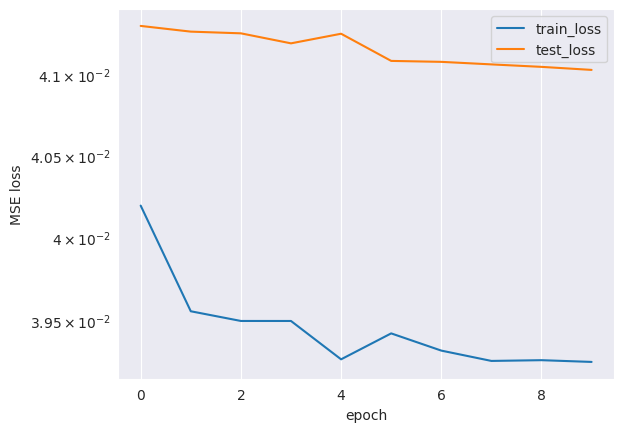

In [56]:
plt.semilogy(history.history['loss'], label='train_loss')
plt.semilogy(history.history['val_loss'], label='test_loss')
plt.ylabel('MSE loss')
plt.xlabel('epoch')
plt.legend()


In [40]:
# Manually save
model_path = "saves/shallow_net_64_16_16.keras"
model.save(model_path)


In [59]:
# Load previous models
model_path = checkpoint_path#"saves/shallow_net_8_16_16.keras"
model = tf.keras.models.load_model(model_path)

# Vizulization

In [41]:
import process

import importlib
importlib.reload(process)

from process import fMRIDataset

In [42]:
viz_subject = 'r03_006'
batch_size = 5
ppdata_path = "/media/large_ssd/ab126/r03_ppdata"
nifti_rel_path = ''
numpy_rel_path = '/numpy'
viz_data_handler = fMRIDataset(ppdata_path, nifti_rel_path=nifti_rel_path, numpy_rel_path=numpy_rel_path, batch_size=batch_size,
                              private_dataset=True, single_subject=viz_subject)

In [43]:
viz_data_handler.precompute_nifti2numpy(set_max_x=96, set_max_y=80, set_max_z=80, only_indices=True)

1st pass 

Subject r03_006
dswauR03_006_AX_Functional_20210408133516_10.nii
Done


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━

Text(0, 0.5, 'Bladder Fullness Sensation')

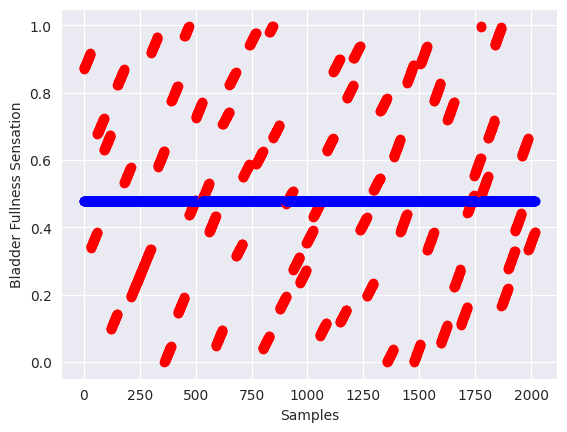

In [55]:
import seaborn as sns

sns.set_style('darkgrid')

ind = 0
plt.figure()
for batch, y in train_handler: # viz_data_handler
    x = ind + np.arange(len(y))
    y_hat = model.predict(batch)
    plt.scatter(x, y, color='r', label='Ground Truth')
    plt.scatter(x, y_hat, color='b', label='Predicted')
    ind += len(y)
    if ind > 2000:
        break
plt.xlabel('Samples')
plt.ylabel('Bladder Fullness Sensation')

In [48]:
y

array([0.11608624, 0.11774461, 0.11940299, 0.12106136, 0.12271973,
       0.12437811, 0.12603648, 0.12769486, 0.12935323, 0.13101161,
       0.13266998, 0.13432836, 0.13598673, 0.13764511, 0.13930348,
       0.14096186, 0.14262023, 0.14427861, 0.14593698, 0.14759536,
       0.14925373, 0.15091211, 0.15257048, 0.15422886, 0.15588723,
       0.15754561, 0.15920398, 0.16086235, 0.16252073, 0.1641791 ])